# **Audio Feature Extraction**
We will be using following audio features for the classification purpose :
* Short-term Average Zero-crossing Rate
* Spectral Centroid
* Spectral Slope
* Spectral Contrast
* RMS Energy
* Chromaticity
* MFCC

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from tqdm import tqdm

dir_path = '/content/drive/MyDrive/ML_DC_Project/dc_dataset/'
csv_path = '/content/drive/MyDrive/ML_DC_Project/mldata.csv'

FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Visualising Audio Signals in Time Domain**

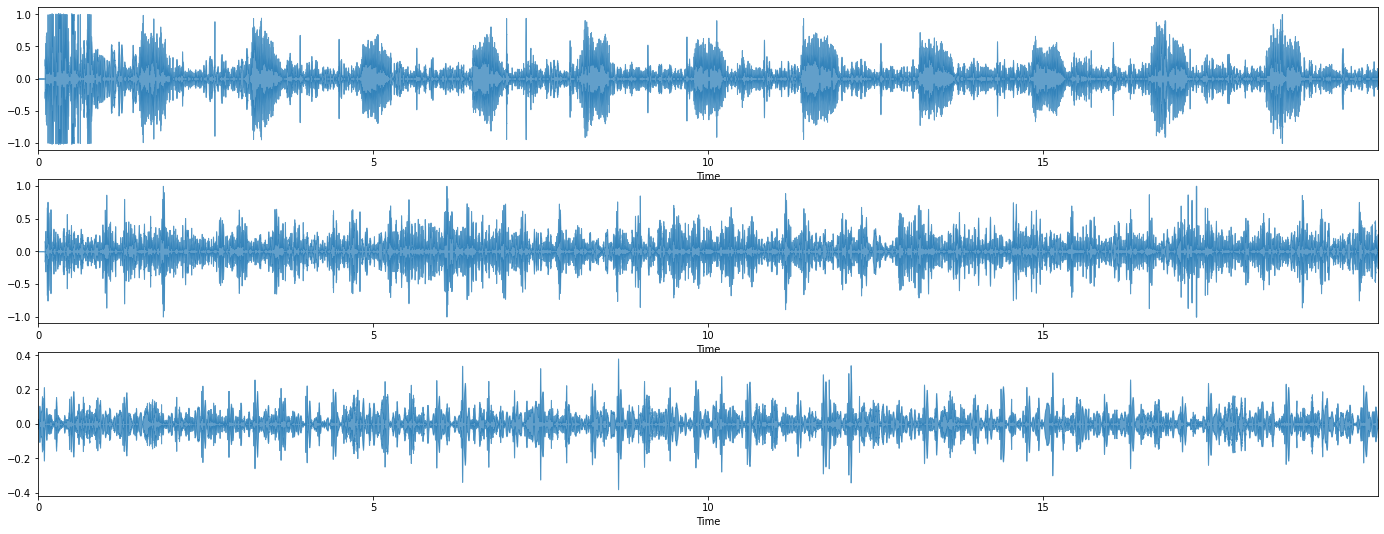

In [ ]:
p1,sr=librosa.load(dir_path+'101.wav')          # p1 represents audio signal for patient 101
p2,sr=librosa.load(dir_path+'159.wav')          # p2 represents audio signal for patient 159
p3,sr=librosa.load(dir_path+'345.wav')          # p3 represents audio signal for patient 345
plt.figure(figsize=(24,9))

plt.subplot(3,1,1)
librosa.display.waveplot(p1,sr=sr, alpha = 0.7)
plt.subplot(3,1,2)
librosa.display.waveplot(p2,sr=sr, alpha = 0.7)
plt.subplot(3,1,3)
librosa.display.waveplot(p3,sr=sr, alpha = 0.7)

plt.show()

## **Visualising RMS Energy**

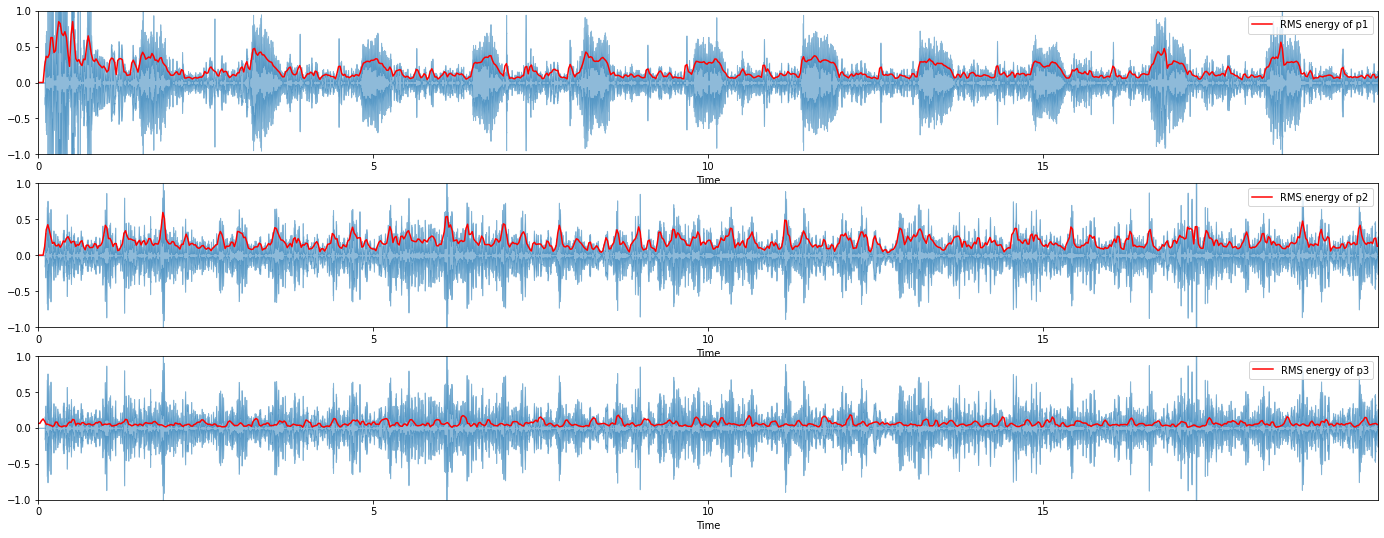

In [ ]:
rms_p1 = librosa.feature.rms(p1,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_p2 = librosa.feature.rms(p2,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
rms_p3 = librosa.feature.rms(p3,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]


frames = range(len(rms_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(24, 9))
plt.subplot(3, 1, 1)
librosa.display.waveplot(p1, alpha=0.5)
plt.plot(t, rms_p1,label='RMS energy of p1', color="r")
plt.ylim((-1, 1))
plt.legend()

plt.subplot(3,1,2)
librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, rms_p2,label='RMS energy of p2', color="r")
plt.ylim((-1, 1))
plt.legend()

plt.subplot(3,1,3)
librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, rms_p3,label='RMS energy of p3', color="r")
plt.ylim((-1, 1))
plt.legend()

plt.show()

## **Visualsing short-term Average Zero Crossing Rate**

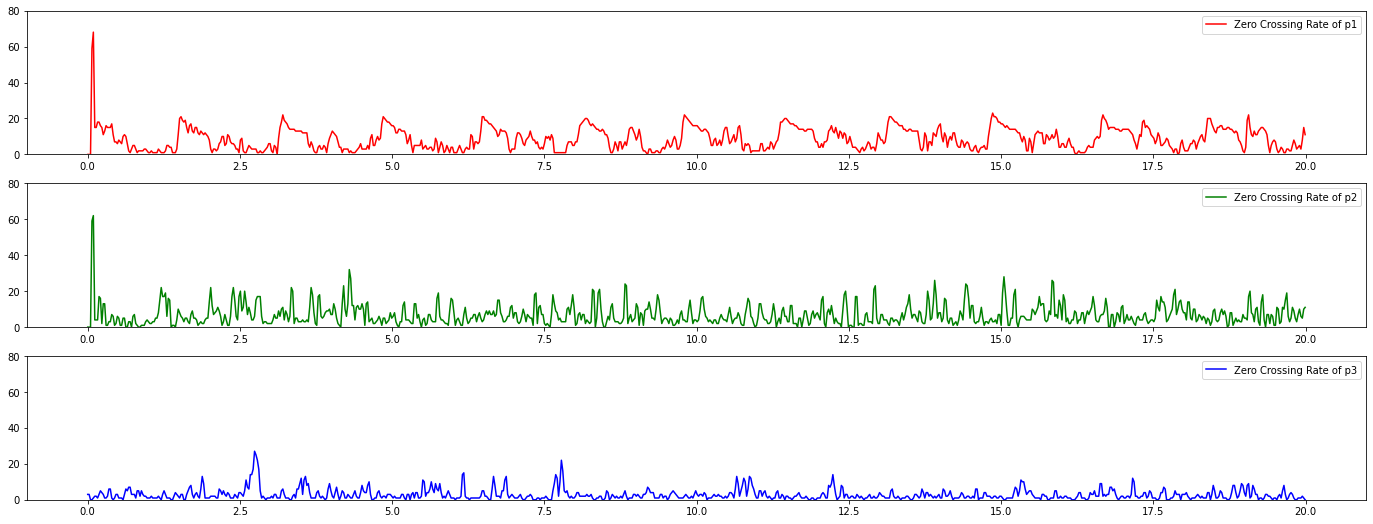

In [ ]:
zcr_p1 = (librosa.feature.zero_crossing_rate(p1,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0])*FRAME_SIZE
zcr_p2 = (librosa.feature.zero_crossing_rate(p2,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0])*FRAME_SIZE
zcr_p3 = (librosa.feature.zero_crossing_rate(p3,frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0])*FRAME_SIZE


frames = range(len(zcr_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(24, 9))
plt.subplot(3, 1, 1)
#librosa.display.waveplot(p1, alpha=0.5)
plt.plot(t, zcr_p1,label='Zero Crossing Rate of p1', color="r")
plt.ylim((0, 80))
plt.legend()

plt.subplot(3,1,2)
#librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, zcr_p2,label='Zero Crossing Rate of p2', color="g")
plt.ylim((0, 80))
plt.legend()

plt.subplot(3,1,3)
#librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, zcr_p3,label='Zero Crossing Rate of p3', color="b")
plt.ylim((0, 80))
plt.legend()

plt.show()

## **Visualising Spectral Centroid**

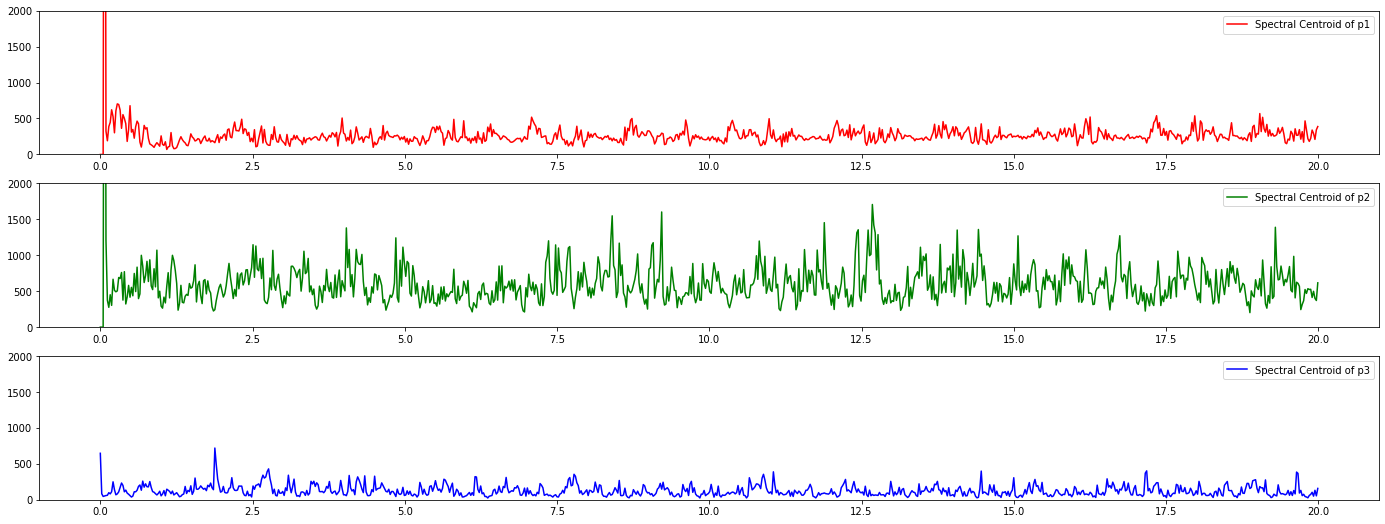

In [ ]:
spectral_centroid_p1 = librosa.feature.spectral_centroid(p1,sr=sr,n_fft = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
spectral_centroid_p2 = librosa.feature.spectral_centroid(p2,sr=sr,n_fft = FRAME_SIZE, hop_length = HOP_LENGTH)[0]
spectral_centroid_p3 = librosa.feature.spectral_centroid(p3,sr=sr,n_fft = FRAME_SIZE, hop_length = HOP_LENGTH)[0]


frames = range(len(spectral_centroid_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(24, 9))
plt.subplot(3, 1, 1)
#librosa.display.waveplot(p1, alpha=0.5)
plt.plot(t, spectral_centroid_p1,label='Spectral Centroid of p1', color="r")
plt.ylim((0, 2000))
plt.legend()

plt.subplot(3,1,2)
#librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, spectral_centroid_p2,label='Spectral Centroid of p2', color="g")
plt.ylim((0, 2000))
plt.legend()

plt.subplot(3,1,3)
#librosa.display.waveplot(p2, alpha=0.5)
plt.plot(t, spectral_centroid_p3,label='Spectral Centroid of p3', color="b")
plt.ylim((0, 2000))
plt.legend()

plt.show()

## **Visualising MFCCs**

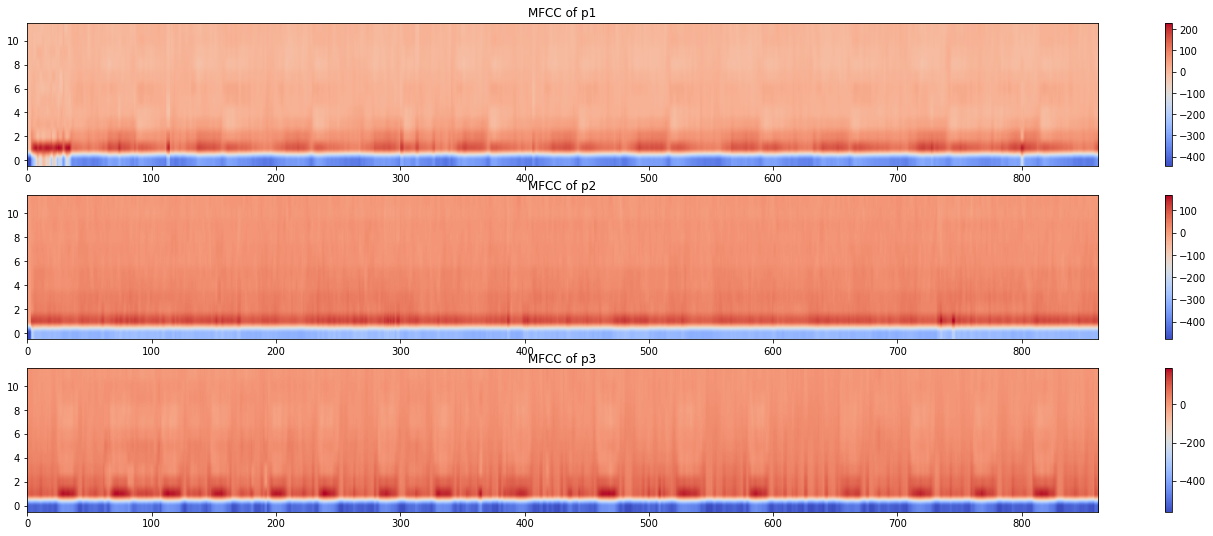

In [ ]:
mfccs_p1 = librosa.feature.mfcc(p1, sr=sr, n_mfcc=12)
mfccs_p2 = librosa.feature.mfcc(p2, sr=sr, n_mfcc=12)
mfccs_p3 = librosa.feature.mfcc(p3, sr=sr, n_mfcc=12)

frames = range(len(mfccs_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(24, 9))
plt.subplot(3, 1, 1)
#librosa.display.waveplot(p1, alpha=0.5)
plt.title('MFCC of p1')
plt.imshow(mfccs_p1,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,2)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('MFCC of p2')
plt.imshow(mfccs_p2,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.plot(t, mfccs_scaled_p2,label='MFCC of p2', color="g")
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,3)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('MFCC of p3')
plt.imshow(mfccs_p3,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.plot(t, mfccs_scaled_p3,label='MFCC of p3', color="b")
#plt.ylim((0, 50))
#plt.legend()

plt.show()

## **Visualising Chromaticity**

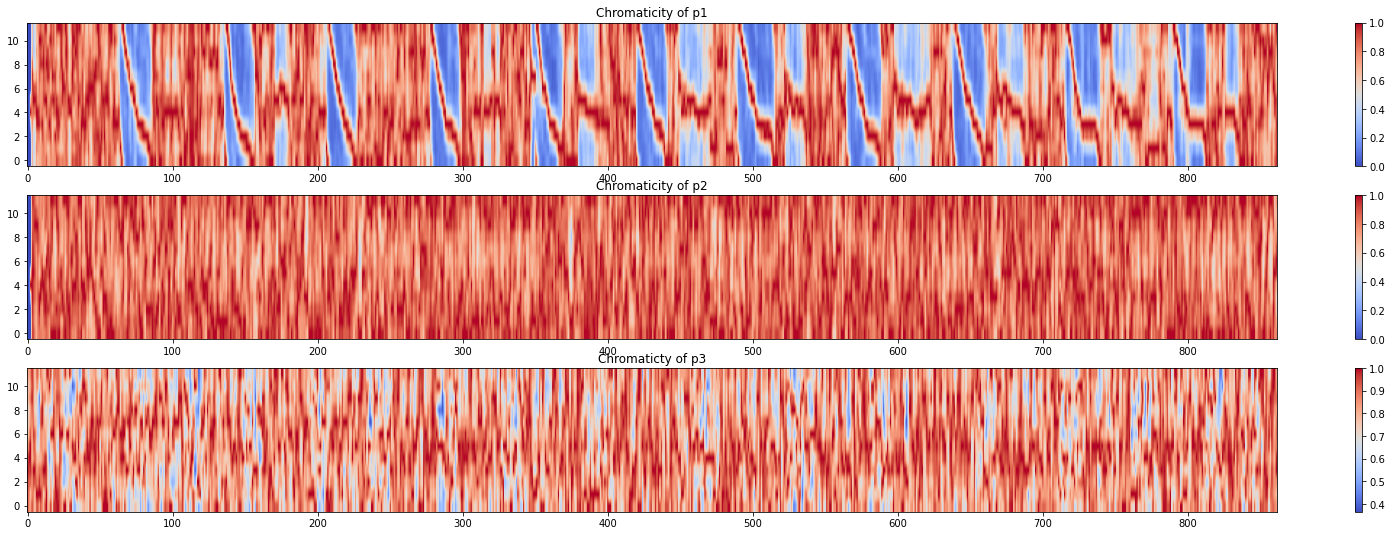

In [ ]:
stft_p1 = np.abs(librosa.stft(p1))
chroma_p1 = librosa.feature.chroma_stft(S=stft_p1, sr=sr)

stft_p2 = np.abs(librosa.stft(p2))
chroma_p2 = librosa.feature.chroma_stft(S=stft_p2, sr=sr)

stft_p3 = np.abs(librosa.stft(p3))
chroma_p3 = librosa.feature.chroma_stft(S=stft_p3, sr=sr)

frames = range(len(chroma_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(28, 9))
plt.subplot(3, 1, 1)
#librosa.display.waveplot(p1, alpha=0.5)
plt.title('Chromaticity of p1')
plt.imshow(chroma_p1,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,2)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('Chromaticity of p2')
plt.imshow(chroma_p2,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,3)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('Chromaticty of p3')
plt.imshow(chroma_p3,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.show()

## **Visualising Spectral Contrast**

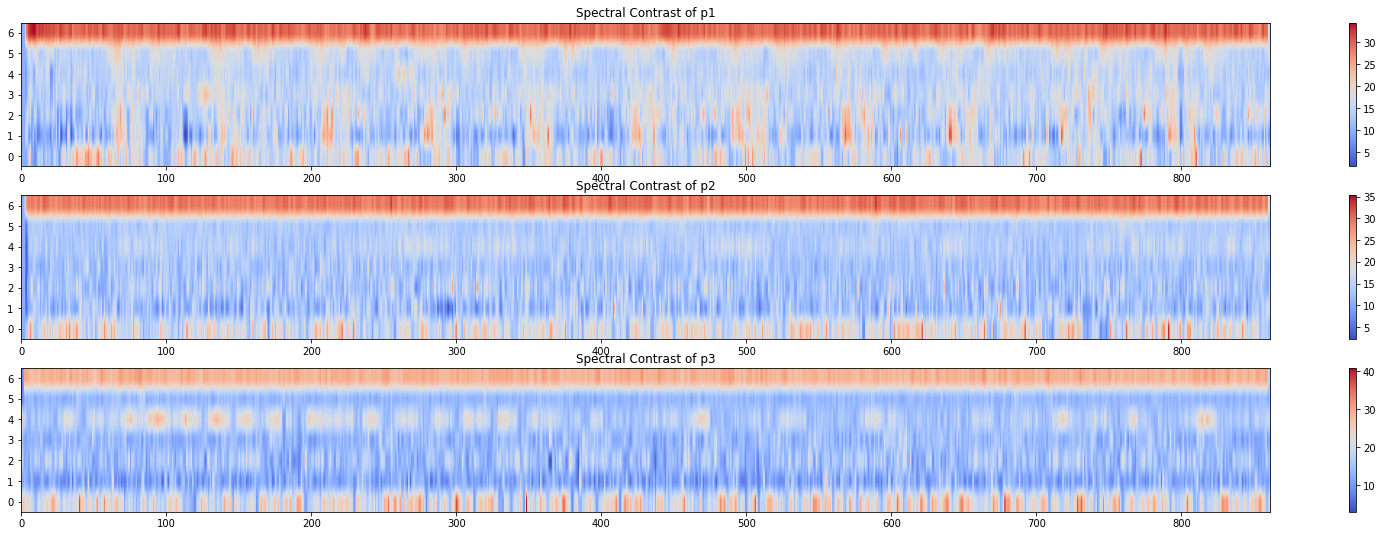

In [ ]:
contrast_p1 = librosa.feature.spectral_contrast(S=stft_p1, sr=sr)
contrast_p2 = librosa.feature.spectral_contrast(S=stft_p2, sr=sr)
contrast_p3 = librosa.feature.spectral_contrast(S=stft_p3, sr=sr)

frames = range(len(contrast_p1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


plt.figure(figsize=(28, 9))
plt.subplot(3, 1, 1)
#librosa.display.waveplot(p1, alpha=0.5)
plt.title('Spectral Contrast of p1')
plt.imshow(contrast_p1,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,2)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('Spectral Contrast of p2')
plt.imshow(contrast_p2,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.subplot(3,1,3)
#librosa.display.waveplot(p2, alpha=0.5)
plt.title('Spectral Contrast of p3')
plt.imshow(contrast_p3,cmap='coolwarm',origin='lower',aspect='auto')
plt.colorbar()
#plt.ylim((0, 50))
#plt.legend()

plt.show()

In [ ]:
!pip install pyACA

     |████████████████████████████████| 57 kB 2.4 MB/s 


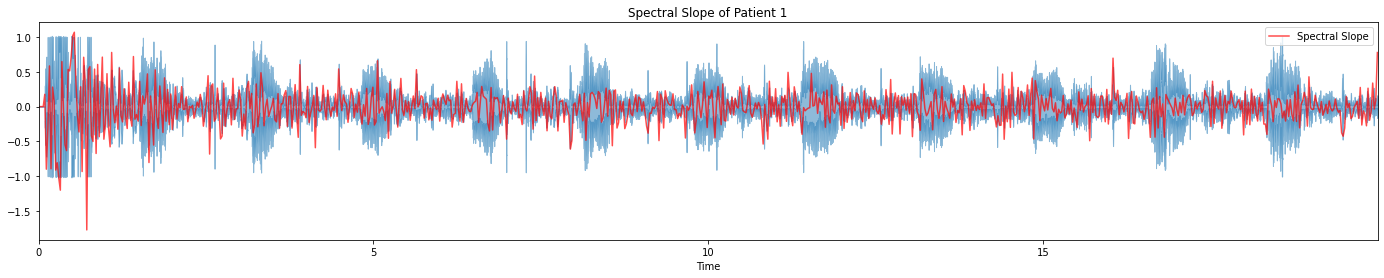

In [ ]:
import pyACA

def SpectralSlope(data, sr, hop_length):
    ss = []
    for i in range(0,len(data),512):
        slice = data[i:i+512]
        s = pyACA.FeatureSpectralSlope(slice, f_s=sr)
        ss.append(s*512)
    return np.array(ss)

ss = SpectralSlope(p1, sr, 512)

frames = range(len(ss))
t = librosa.frames_to_time(frames, hop_length=512)

plt.figure(figsize=(24,4))
plt.title('Spectral Slope of Patient 1')
librosa.display.waveplot(p1,alpha=0.5)
plt.plot(t, ss, 'r', alpha = 0.7, label='Spectral Slope')
plt.legend()
plt.show()

## Extracting the mentioned features using a funtion :

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

import pyACA

def SpectralSlope(data, sr, hop_length):
    ss = []
    for i in range(0,len(data),512):
        slice = data[i:i+512]
        s = pyACA.FeatureSpectralSlope(slice, f_s=sr)
        ss.append(s*512)
    return np.array(ss)

def grad(arr):
    arr = np.array(arr)
    grad_arr = []
    for i in range(arr.shape[0]):
        grad_arr.append(np.gradient(arr[i]))
    return np.array(grad_arr)

def extract_features(file_path: str, frame_length, hop_length):

    audio_signal, sr = librosa.load(file_path)

    stft = np.abs(librosa.stft(audio_signal))
    mfccs_features = librosa.feature.mfcc(audio_signal, sr=sr, n_mfcc=12)
    # mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    mfccs_grad = grad(mfccs_features)
    all_mfccs = np.concatenate((mfccs_features,mfccs_grad))
    # chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
    # contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
    zcr = frame_length*(librosa.feature.zero_crossing_rate(audio_signal, frame_length=frame_length, hop_length=hop_length)[0])
    rms = librosa.feature.rms(audio_signal, frame_length=frame_length, hop_length=hop_length)[0]
    spectral_centroid = librosa.feature.spectral_centroid(audio_signal, sr=sr, n_fft=frame_length, hop_length=hop_length)[0]
    spectral_slope = SpectralSlope(audio_signal, sr, hop_length)

    return [zcr, rms, spectral_centroid, all_mfccs, chroma, contrast, spectral_slope]


In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

np_dir = '/content/drive/MyDrive/ML_DC_Project/np_arrays/'

for patient in tqdm(range(101,102), 'Extraction Progress '):
  file_name = os.path.join(os.path.abspath(dir_path)+'/'+str(patient)+'.wav')
  extracted_arrs = extract_features(file_name,FRAME_LENGTH,HOP_LENGTH)
  np.savez(np_dir+str(patient)+'.npz',zcr = extracted_arrs[0],rms = extracted_arrs[1],spectral_centroid = extracted_arrs[2],mfcc = extracted_arrs[3], chroma = extracted_arrs[4],spectral_contrast = extracted_arrs[5], spectral_slope=extracted_arrs[6])


In [ ]:
arrs = np.load(np_dir+'101.npz')
final = []


for i in arrs:
    print(i,arrs[i].shape)
    if arrs[i].shape[0]!=862:
        for ar in arrs[i]:
            final.append(ar)
    else:
        final.append(arrs[i])

final = np.array(final).T

zcr (862,)
rms (862,)
spectral_centroid (862,)
mfcc (24, 862)
chroma (12, 862)
spectral_contrast (7, 862)
spectral_slope (862,)


In [ ]:
np.array(final).shape

(862, 47)